### Analysis of Lyme Disease Occurance in the US

Lyme disease, a pathogen transmitted to humans by ticks, is a problem in many states throughout the US and a public health concern. Here I assess data on the number of cases of Lyme disease in the US for data collected between 2000 and 2019. Data on the US population is combined with this dataset to then assess the number of cases relative to the state populations. 

In [1]:
# Import python packages needed
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the geopandas library
import geopandas as gpd

In [2]:
# Choose path to where files are saved on specific computer
computer_path = 'C:/Users/Emily/Google Drive/Data_science/'

#### Lyme disease data
Source:
https://www.cdc.gov/lyme/stats/survfaq.html

In [3]:
# load dataset
lyme_data = pd.read_csv(os.path.join(computer_path,'LD-Case-Counts-by-County-00-19.csv'),engine='python',encoding='latin1').drop(['Unnamed: 24', 'Unnamed: 25'], axis=1)
lyme_data['Cty'] = lyme_data['Ctyname'].str.slice(0,-6) # strip off the word 'County' from the Ctyname column and add as new column
lyme_data = lyme_data[lyme_data.CTYCODE != 999] # drop lines that are not a county
lyme_data['County'] = lyme_data['Cty'].str.strip()
lyme_data = lyme_data.drop(['Cty'], axis=1)
lyme_data.head(2)

,Ctyname,Stname,STCODE,CTYCODE,Cases2000,Cases2001,Cases2002,Cases2003,Cases2004,Cases2005,...,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,Cases2018,Cases2019,County
0,Autauga County,Alabama,1,1,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,1,Autauga
1,Baldwin County,Alabama,1,3,1,0,1,0,0,0,...,1,1,0,3,1,2,2,0,0,Baldwin


##### Load GIS Map data
Source:
https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.2018.html

In [4]:
# Load the json file with county coordinates
county_Data = gpd.read_file(os.path.join(computer_path,'cb_2018_us_county_5m.geojson'))
county_Data.head(2)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"MULTIPOLYGON (((-83.86976 39.05553, -83.86568 ..."
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292630,12557304,"MULTIPOLYGON (((-120.07248 38.50987, -120.0723..."


In [5]:
# Load the json file with state coordinates
state_Data = gpd.read_file(os.path.join(computer_path,'cb_2018_us_state_5m.geojson'))
state_Data.head(2)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"MULTIPOLYGON (((-104.05351 41.15726, -104.0526..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."


In [6]:
# Merge states and counties dataframes
geo_data = pd.merge(county_Data, state_Data[['STATEFP','NAME']], left_on='STATEFP', right_on='STATEFP', how='right').rename(columns={"NAME_x": "County", "NAME_y": "State"})

geo_data.head(2)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,County,LSAD,ALAND,AWATER,geometry,State
0,31,009,00835827,0500000US31009,31009,Blaine,06,1840673980,9443894,"MULTIPOLYGON (((-100.26762 42.08615, -100.1676...",Nebraska
1,31,111,00835877,0500000US31111,31111,Lincoln,06,6641072810,28449819,"MULTIPOLYGON (((-101.26969 41.39493, -100.7132...",Nebraska


In [7]:
# Merge state and county dataframe with lyme dataframe
data = pd.merge(geo_data, lyme_data, left_on=['County','State'], right_on=['County','Stname'], how='right')

# Remove Hawaii
stateToRemove = ['Hawaii']
data = data[~data.State.isin(stateToRemove)]

data.head(2)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,County,LSAD,ALAND,AWATER,geometry,...,Cases2010,Cases2011,Cases2012,Cases2013,Cases2014,Cases2015,Cases2016,Cases2017,Cases2018,Cases2019
0,01,001,00161526,0500000US01001,01001,Autauga,06,1.539602e+09,2.570696e+07,"MULTIPOLYGON (((-86.91760 32.66417, -86.81657 ...",...,0,0,0,0,0,0,2,0,0,1
1,01,003,00161527,0500000US01003,01003,Baldwin,06,4.117547e+09,1.133056e+09,"MULTIPOLYGON (((-88.02927 30.22271, -88.02399 ...",...,0,1,1,0,3,1,2,2,0,0


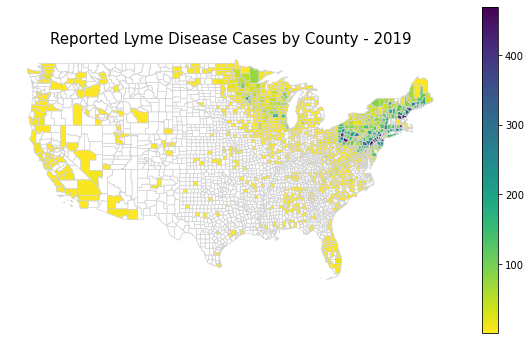

In [8]:
# Make map of 2019 lime data

data_2019 = data[data.Cases2019 != 0] # drop counties without data

fig, ax = plt.subplots(1, figsize=(10,6))
data.plot(edgecolor='lightgray', linewidth=0.7, color='white', ax=ax) # plot all states white with gray edges
data_2019.plot(cmap='viridis_r', linewidth=0.7, column='Cases2019', edgecolor='lightgray', ax=ax, legend=True) # plot only states with occurances using colormap
ax.axis('off')
ax.set_title('Reported Lyme Disease Cases by County - 2019', fontdict={'fontsize': '15', 'fontweight' : '3'})
plt.show()

By merging the Lyme disease dataset with the GIS shapefile, I am able to plot the distribution of lyme disease cases by county throughout the US. This shows that most cases occur in New England, New York, and Pensylvania, with additional high case counties in states around the Great Lakes like Wisconsin and Minnesota. 

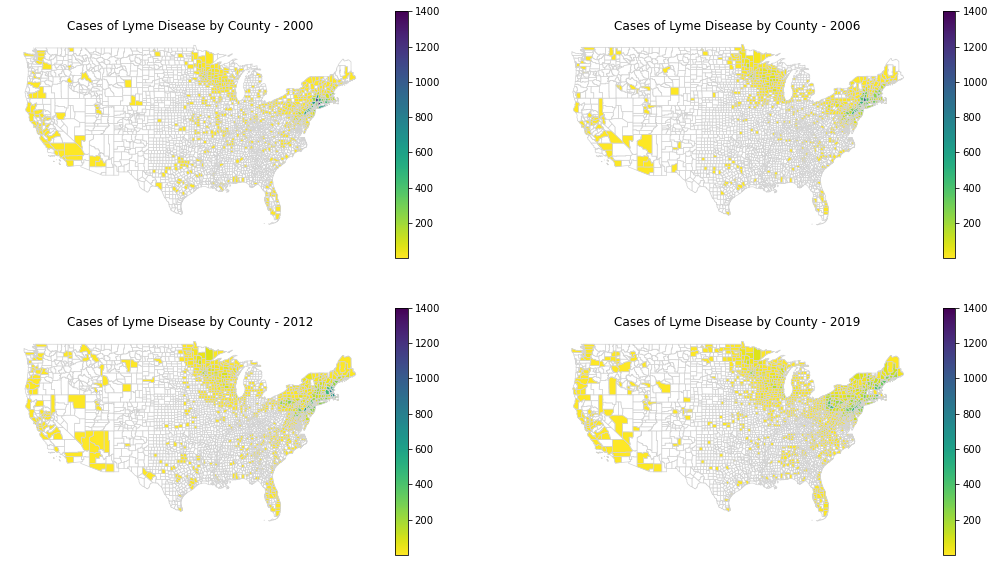

In [9]:
# Map figure of lyme occurance during different years

data_2000 = data[data.Cases2000 != 0] # drop counties without data
data_2006 = data[data.Cases2006 != 0] # drop counties without data
data_2012 = data[data.Cases2012 != 0] # drop counties without data
data_2019 = data[data.Cases2019 != 0] # drop counties without data

fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(221)
data.plot(edgecolor='lightgray', linewidth=0.7, color='white', ax=ax1)
data_2000.plot(cmap='viridis_r', linewidth=0.7, column='Cases2000', edgecolor='lightgray', legend=True, ax=ax1, vmin= 1, vmax=1400)
ax1.axis('off')

ax2 = fig.add_subplot(222)
data.plot(edgecolor='lightgray', linewidth=0.7, color='white', ax=ax2)
data_2006.plot(cmap='viridis_r', linewidth=0.7, column='Cases2006', edgecolor='lightgray', legend=True, ax=ax2, vmin= 1, vmax=1400)
ax2.axis('off')

ax3 = fig.add_subplot(223)
data.plot(edgecolor='lightgray', linewidth=0.7, color='white', ax=ax3)
data_2012.plot(cmap='viridis_r', linewidth=0.7, column='Cases2012', edgecolor='lightgray', legend=True, ax=ax3, vmin= 1, vmax=1400)
ax3.axis('off')

ax4 = fig.add_subplot(224)
data.plot(edgecolor='lightgray', linewidth=0.7, color='white', ax=ax4)
data_2019.plot(cmap='viridis_r', linewidth=0.7, column='Cases2019', edgecolor='lightgray', legend=True, ax=ax4, vmin= 1, vmax=1400)
ax4.axis('off')


ax1.title.set_text('Cases of Lyme Disease by County - 2000')
ax2.title.set_text('Cases of Lyme Disease by County - 2006')
ax3.title.set_text('Cases of Lyme Disease by County - 2012')
ax4.title.set_text('Cases of Lyme Disease by County - 2019')

plt.show()

The map of the cases by county can also be replicated for different years of data. These maps indicate that Lyme disease may be spreading geographically to more counties as time passes. This is further explored in the next analysis. 

In [10]:
# Count number of counties reporting Lyme cases for each year
yr_cols = list(lyme_data.columns)[4:-1] # list of years for which there is data - column names: 'CasesYear'
yrs = list(lyme_data.columns.str.slice(5,))[4:-1] # strip off the word 'cases' from columns to have only the year

affected_ctys = []
for i in range(0,len(yr_cols)):
    count = len(lyme_data[lyme_data[yr_cols[i]]!=0]) # number of counties with cases
    affected_ctys.append([int(yrs[i]), count])
yrly_affected_ctys = pd.DataFrame(affected_ctys, columns =['Year','Counties with Cases'])
yrly_affected_ctys.head(2)

,Year,Counties with Cases
0,2000,723
1,2001,668


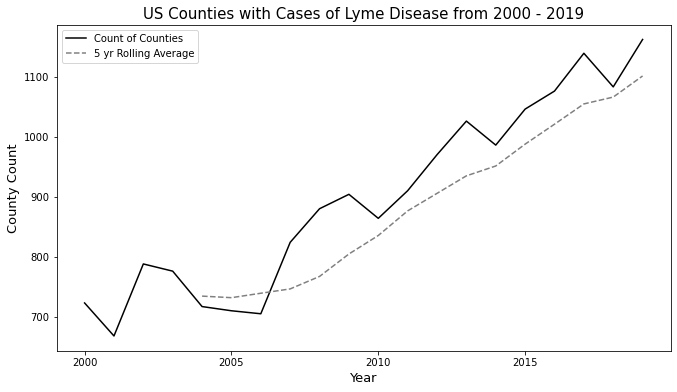

In [11]:
# Plot the number of counties with cases through time
yrly_affected_ctys.plot(kind='line', x = 'Year', y = 'Counties with Cases', figsize=(11,6), color='k', label='Count of Counties')
plt.ylabel('County Count', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.title('US Counties with Cases of Lyme Disease from 2000 - 2019', fontsize=15)

# calculate rolling average
roll_ave = yrly_affected_ctys['Counties with Cases'].rolling(5).mean()
plt.plot(np.asarray(yrly_affected_ctys['Year']), roll_ave, color='gray', linestyle='--', label='5 yr Rolling Average')
plt.legend()

plt.xticks(np.arange(2000, 2020, 5))
plt.show()

In [12]:
np.mean(yrly_affected_ctys[0:4]['Counties with Cases'])/np.mean(yrly_affected_ctys[-4:]['Counties with Cases'])

0.6625560538116592

Further analysis of the county case data indicates that more counties are reporting cases of lyme disease now than 20 years ago, with the number of counties that reported cases increasing by 66% when comparing the first four years of the monitoring period to the last four years of the monitoring period. This spread of the disease means that public health officials need to warn people of the spread so that people in the areas to which the disease is spreading are aware and informed how to check themselves and their pets for ticks. 

#### Analyze by state
Next I have aggregated the Lyme disease data by state to better assess in which states the disease is most prevelant.

In [13]:
state_lyme = lyme_data.groupby(['Stname']).sum() # sum the total lyme cases by state for each year
state_lyme.drop(['STCODE','CTYCODE'], axis=1, inplace=True)
state_lyme = state_lyme.transpose().rename_axis(None, axis=1).rename_axis('', axis=0)
state_lyme['Year'] = state_lyme.index.str.slice(5,) # strip off the word 'cases'
state_lyme.set_index(['Year'], drop=True, inplace=True)
state_lyme.head(2)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
2000,6,2,2,7,96,0,3662,167,11,54,...,0,28,77,3,40,149,9,35,630,3
2001,10,2,3,4,95,0,3475,152,17,43,...,0,31,75,1,18,156,9,16,597,1


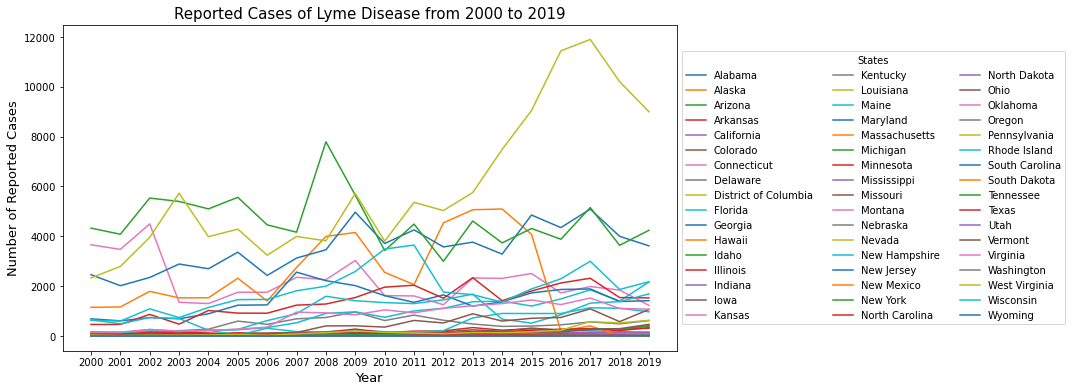

In [14]:
# Plot lyme cases for all states through time
fig, ax = plt.subplots(1, figsize=(11,6))

states = list(state_lyme.columns)

for i in range(0,len(states)):
    plt.plot(state_lyme.index, state_lyme[states[i]], label = states[i])
plt.ylabel('Number of Reported Cases', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='States', ncol=3)
plt.title('Reported Cases of Lyme Disease from 2000 to 2019', fontsize=15)

plt.show()

The above figure shows that most states have fairly low and constant levels of the disease. However, one state stands out as having a much larger number of cases than other states, particularly since 2011. Below we focus in on the worst 10 states to get a better idea of which states these are.

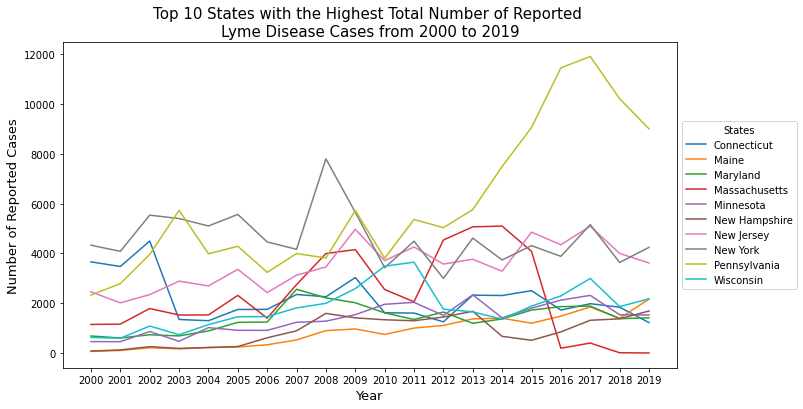

In [15]:
# Plot lyme cases for the worst 10 states
fig, ax = plt.subplots(1, figsize=(11,6))

states = list(state_lyme.columns)
for i in range(0,len(states)):
    if state_lyme[states[i]].sum() > 17000:
        plt.plot(state_lyme.index, state_lyme[states[i]], label = states[i])
plt.ylabel('Number of Reported Cases', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='States')
plt.title('Top 10 States with the Highest Total Number of Reported \nLyme Disease Cases from 2000 to 2019', fontsize=15)
plt.show()

The above figure focuses in on the 10 states that have had the highest total recorded cases during the survey period. All of these states are located in the Northeast and around the Great Lakes. Pennsylvania stands out as the worst state since 2011, with a large spike in cases occuring between approximately 2014 and 2019. Massachusetts experienced a spike in cases between 2012 and 2015, though since then cases have dropped below the rest of the 10 worst states. New York had the highest number of cases from 2000 to 2009, with case count remaining fairly steady since that period.

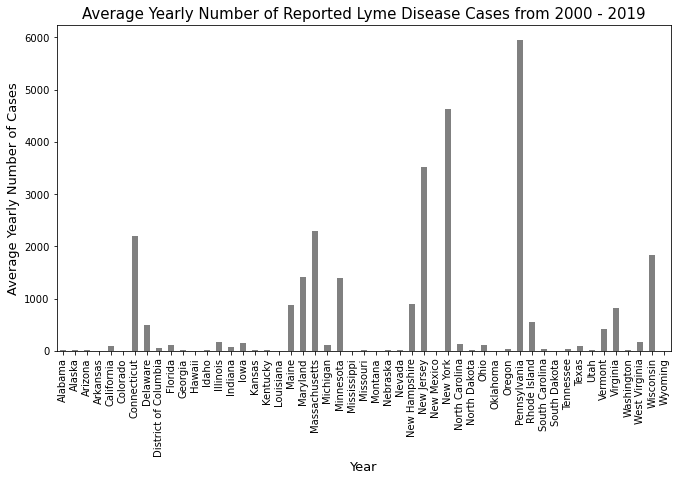

In [16]:
# Make plot of the average yearly number of lyme cases by state
US_lyme = state_lyme.mean() # mean yearly cases of lyme by state
US_lyme.plot(kind='bar', figsize=(11,6), color='gray')
plt.ylabel('Average Yearly Number of Cases', fontsize=13)
plt.title('Average Yearly Number of Reported Lyme Disease Cases from 2000 - 2019', fontsize=15)
plt.xlabel('Year', fontsize=13)
plt.show()

Next, I show the total case count for each state during the observation period. Pennsylvania, New York, and New Jersey have the highest number of cases, while Connecticut, Massachusetts, and Wisconsin constitute a group of states with the next highest number of cases. However, these plots do not take into account the population of each of these states. 

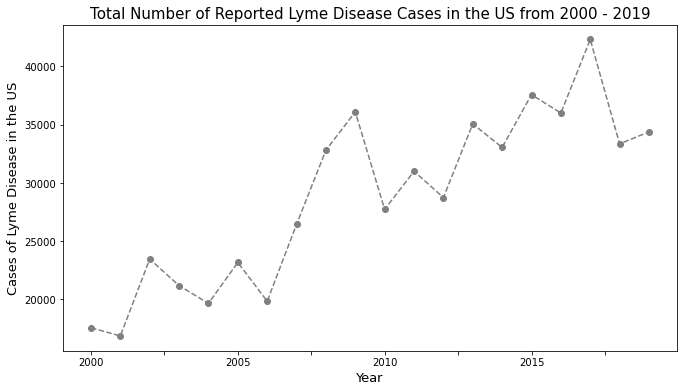

In [17]:
# Plot lyme cases in the US through time
US_lyme_yr = state_lyme.sum(axis=1) # sum the total lyme cases in US for each year
US_lyme_yr.plot(kind='line', figsize=(11,6), color='gray', marker='o', linestyle='--')
plt.ylabel('Cases of Lyme Disease in the US', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.title('Total Number of Reported Lyme Disease Cases in the US from 2000 - 2019', fontsize=15)
plt.show()

Next, in the above plot all of the cases of Lyme have been tabulated for each year, showing that while there is some fluctuation from year to year, cases are clearly increasing through time, having approximately doubled during the last 20 years.

### Comparing Increase to state population
Next census data is used to compare the cases of Lyme to the population of each state. Since the census is only done every 10 years, I compare the Lyme data from 2000 and 2010. I then also use the Lyme data from 2019 to compare to the 2020 census data. While this is slightly less accurate, it at least provide a rough estimate of the cases per capita for 2019. 

Source:
https://www.census.gov/data/tables/time-series/dec/popchange-data-text.html

In [18]:
# load population dataset and select only data desired for analysis
pop_data = pd.read_csv(os.path.join(computer_path,'census_data-apportionment.csv')).drop(['Resident Population Density Rank', 'Number of Representatives','Change in Number of Representatives','Average Apportionment Population Per Representative'], axis=1)
pop_data.drop(pop_data[pop_data['Geography Type'] != 'State'].index, inplace=True) # drop region data to only have state data
pop_data.drop(pop_data[pop_data['Year'] < 2000].index, inplace=True) # drop data from before 2000
pop_data.reset_index(inplace=True, drop=True)
pop_data.head()

,Name,Geography Type,Year,Resident Population,Percent Change in Resident Population,Resident Population Density
0,Alabama,State,2000,4447100,10.1,87.8
1,Alaska,State,2000,626932,14.0,1.1
2,Arizona,State,2000,5130632,40.0,45.2
3,Arkansas,State,2000,2673400,13.7,51.4
4,California,State,2000,33871648,13.8,217.4


In [19]:
# Calculate the rate of lyme per 100,000 residents in each state for the three census years (use 2019 lyme data with 2020 census data as estimate)
state_lyme_wgh = state_lyme[(state_lyme.index == '2000')|(state_lyme.index == '2010')|(state_lyme.index == '2019')].copy()
census_yrs = ['2000','2010','2020']
lyme_yrs = ['2000','2010','2019']
states = list(state_lyme.columns)

for YR in range(0,len(census_yrs)):
    for STATES in states:
        weighted_val = state_lyme_wgh[STATES][lyme_yrs[YR]]/np.asarray(pop_data[(pop_data['Name']==STATES) & (pop_data['Year'] == int(census_yrs[YR]))]['Resident Population'])*100000 # cases per hundred thousand of residents
        state_lyme_wgh.loc[lyme_yrs[YR], STATES]= weighted_val # replace value in matrix with weighted number of cases
state_lyme_wgh

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
2000,0.134919,0.319014,0.038982,0.261839,0.283423,0.000000,107.529881,21.311894,1.922879,0.337872,...,0.000000,0.492153,0.369272,0.134338,6.570011,2.104961,0.152695,1.935472,11.745678,0.607556
2010,0.041843,0.985595,0.031289,0.000000,0.346272,0.059652,45.326134,68.936024,6.979956,0.446777,...,0.122823,0.567277,0.564712,0.108543,56.892548,13.073327,0.237934,7.825174,61.333015,0.000000
2019,1.313621,0.409059,0.139831,0.597704,0.364205,0.138559,33.999419,62.225491,14.502317,0.752152,...,1.127819,0.448571,0.072052,0.580753,165.454526,12.454537,0.558059,35.066867,36.954601,0.346710


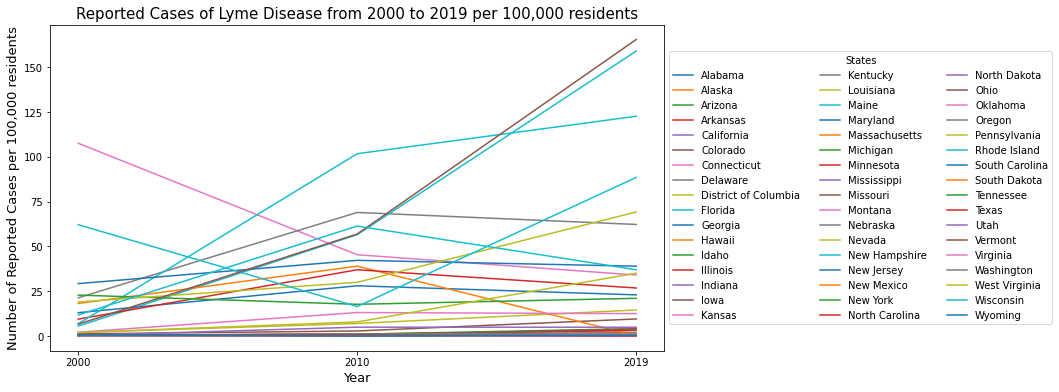

In [20]:
# Plot lyme cases for all states through time
fig, ax = plt.subplots(1, figsize=(11,6))

states = list(state_lyme_wgh.columns)

for i in range(0,len(states)):
    plt.plot(state_lyme_wgh.index, state_lyme_wgh[states[i]], label = states[i])
plt.ylabel('Number of Reported Cases per 100,000 residents', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='States', ncol=3)
plt.title('Reported Cases of Lyme Disease from 2000 to 2019 per 100,000 residents', fontsize=15)
plt.show()

The above figure shows the cases reported per every 100,000 residents for the three census years. Again, most of the states have very low levels that do not fluctuate through time. Some of these states with very low case counts could even be cases that were acquired during vacations to states where Lyme disease is common. 

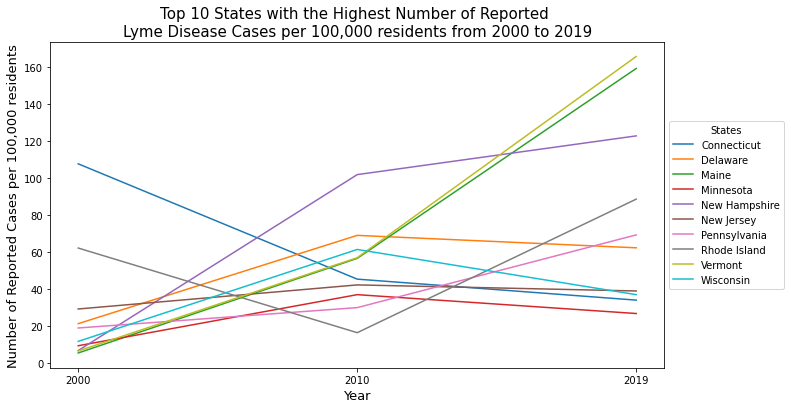

In [21]:
# Plot lyme cases for the worst 10 states
fig, ax = plt.subplots(1, figsize=(11,6))

states = list(state_lyme_wgh.columns)
for i in range(0,len(states)):
    if state_lyme_wgh[states[i]].sum() > 65:
        plt.plot(state_lyme_wgh.index, state_lyme_wgh[states[i]], label = states[i])
plt.ylabel('Number of Reported Cases per 100,000 residents', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='States')
plt.title('Top 10 States with the Highest Number of Reported \nLyme Disease Cases per 100,000 residents from 2000 to 2019', fontsize=15)
plt.show()

The plot above again focuses on only the 10 worst states, with cases weighted per 100,000 residents. When weighted by the state population, Vermont, Maine, and New Hampshire have the worst prevelance since about 2010, with over 120 cases per 100,000 residents, or 1.2 cases per every 1000 residents. When the survey started in 2000, Connecticut and Rhode Island had the worst case counts bases on population. Pennsylvania still has one of the higher case counts in 2019, but once corrected for population it is not as high as some other states. Once issue with this analysis is that New York state drops out of the top 10. However, the large population of New York city is likely skewing this analysis, since it is unlikely to catch Lyme in the city, but a large percentage of the population lives there. Additional data on county level populations would be beneficial to more accurately assess the case rate per capita, especially for the state of New York.

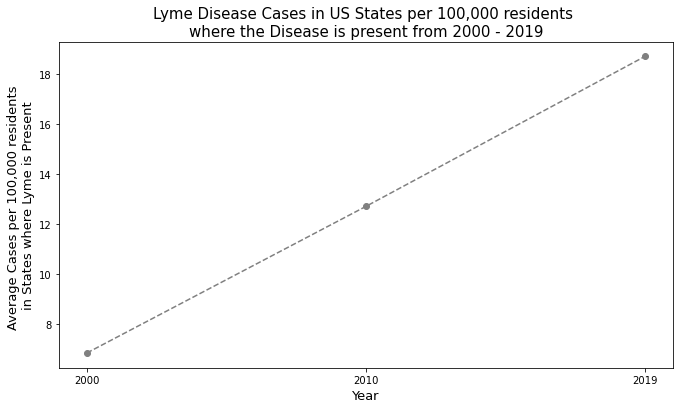

In [22]:
# Plot lyme cases in the US through time
US_lyme_wgh = pd.DataFrame(state_lyme_wgh.mean(axis=1), columns=['Case per 100000']) # sum the total lyme cases in US for each year

fig, ax = plt.subplots(1, figsize=(11,6))
plt.plot(np.asarray(US_lyme_wgh.index), np.asarray(US_lyme_wgh['Case per 100000']), color='gray', marker='o', linestyle='--')
plt.ylabel('Average Cases per 100,000 residents \nin States where Lyme is Present', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.title('Lyme Disease Cases in US States per 100,000 residents \nwhere the Disease is present from 2000 - 2019', fontsize=15)
plt.show()

Lastly, I have calculated the average cases per 100,000 residents in the states where Lyme disease is present for the three census years. This shows that even when corrected for population, cases of Lyme disease are becoming more common in the US, with the number of cases per 100,000 people almost doubling (increase of 185%) from 2000 to 2010 and increasing again by 150% from 2010 to 2019, for a total increase of over 270% (almost a tripling of cases) during the 20 year observation period. The increasing prevelance of this disease indicates that more efforts should be put towards educating people of the risk (including tourists visiting high risk areas), how to properly protect yourself and check for ticks, what to do if you find a tick on you or someone else, and what symptoms to watch out for (even if you do not find a tick but live in a high risk area). Also, the increasing prevelance of the disease also indicates an increasing need for more study of the disease and potential vaccines to prevent the disease. 

In [23]:
US_lyme_wgh

,Case per 100000
Year,
2000,6.854045
2010,12.711610
2019,18.706224


In [24]:
US_lyme_wgh['Case per 100000'][1]/US_lyme_wgh['Case per 100000'][0]*100

185.46141764358345

In [25]:
US_lyme_wgh['Case per 100000'][2]/US_lyme_wgh['Case per 100000'][1]*100

147.15857348876514

In [26]:
US_lyme_wgh['Case per 100000'][2]/US_lyme_wgh['Case per 100000'][0]*100

272.9223765763383